In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv('Financial_inclusion_dataset.csv')
df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [4]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [9]:
!pip install pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 80.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d1a9c3c0accb50a8f747f11709b9ad778e5afae98fddd757ea24657e7bcd6c65
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [5]:
from ydata_profiling import ProfileReport

ModuleNotFoundError: No module named 'ydata_profiling'

In [12]:
profile = ProfileReport(df,title = 'Rapport de profillage')
profile.to_notebook_iframe
profile.to_file('report.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x7ee753dd1bb0, file "/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/correlations_pandas.py", line 167>')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
var_num = df.select_dtypes(include=[np.number]).columns
var_num

Index(['year', 'household_size', 'age_of_respondent'], dtype='object')

In [12]:
var_cat = df.select_dtypes(include=[object]).columns
var_cat = var_cat.drop('bank_account')
var_cat

Index(['country', 'uniqueid', 'location_type', 'cellphone_access',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [15]:
df['bank_account'].replace(['Yes','No'], [1,0], inplace=True)

In [16]:
df['bank_account']

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64

In [17]:
df[var_num] = df[var_num].fillna(df[var_num].mean())

In [18]:
df[var_cat] = SimpleImputer(strategy='most_frequent').fit_transform(df[var_cat])

In [19]:
df.isnull().sum().sum()

0

In [20]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


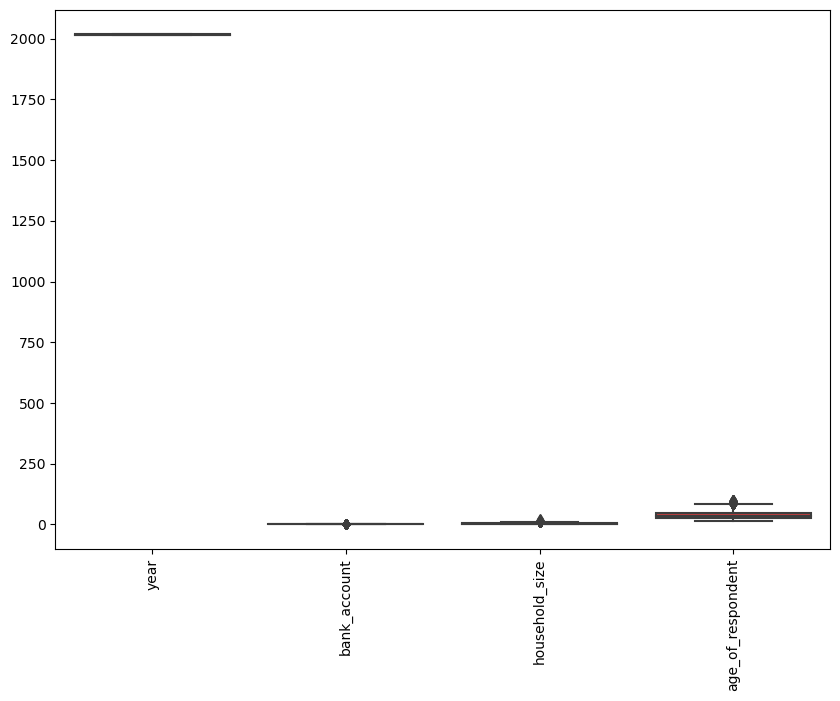

In [21]:
figure = plt.figure(figsize=(10,7))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [22]:
Q1 = df[var_num].quantile(0.25)
Q3 = df[var_num].quantile(0.75)
IQR = Q3 - Q1

born_inf = Q1 - 1.5 * IQR
born_sup = Q3 + 1.5 * IQR

df = df[~((df[var_num] < born_inf) | (df[var_num] > born_sup)).any(axis=1)]

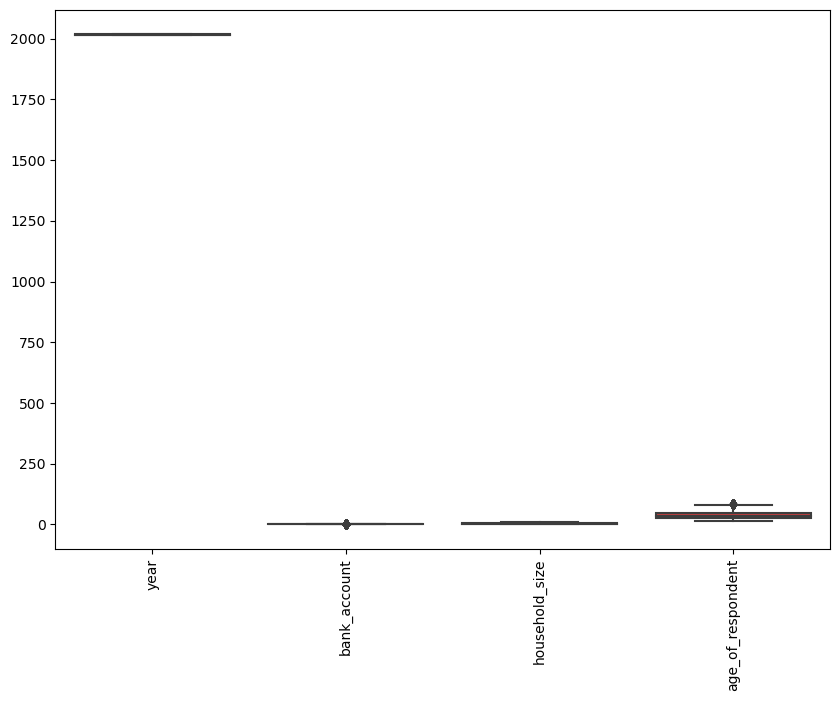

In [23]:
figure = plt.figure(figsize=(10,7))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [25]:
for col in var_cat:
    df[col] = LabelEncoder().fit_transform(df[col])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10432\2951943624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])


In [26]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,0,1,0,1,3,24,0,5,2,3,9
1,0,2018,1111,0,0,0,5,70,0,1,4,0,4
2,0,2018,2222,1,1,1,5,26,1,3,3,5,9
3,0,2018,3333,0,0,1,5,34,0,1,2,2,3
4,0,2018,4444,0,1,0,8,26,1,0,3,2,5


In [30]:
x= df.drop('bank_account',axis=1)
y= df['bank_account']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [33]:
model_svm = SVC(kernel='linear')
model_svm.fit(x_train,y_train)


SVC(kernel='linear')

In [34]:
y_pred_svm = model_svm.predict(x_test)

In [35]:
score_svm = model_svm.score(x_test,y_test)
score_svm

0.8511242086880594

In [36]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
y_pred_rf = model_rf.predict(x_test)

In [38]:
score_rf = model_rf.score(x_test,y_test)
score_rf

0.8714254529578694

In [39]:
mdeph = range(1,15)
for i in mdeph:
  model_dt = DecisionTreeClassifier(max_depth=i)
  model_dt.fit(x_train,y_train)
  score_dt = model_dt.score(x_test,y_test)
  print('score avec une profondeur de ',i, 'est ',score_dt)

score avec une profondeur de  1 est  0.8550534817725387
score avec une profondeur de  2 est  0.8696791093647676
score avec une profondeur de  3 est  0.8703339882121808
score avec une profondeur de  4 est  0.8720803318052827
score avec une profondeur de  5 est  0.8725169177035582
score avec une profondeur de  6 est  0.8729535036018337
score avec une profondeur de  7 est  0.8749181401440733
score avec une profondeur de  8 est  0.8762278978388998
score avec une profondeur de  9 est  0.8694608164156298
score avec une profondeur de  10 est  0.8679327657716656
score avec une profondeur de  11 est  0.8635669067889107
score avec une profondeur de  12 est  0.8583278760096049
score avec une profondeur de  13 est  0.8546168958742633
score avec une profondeur de  14 est  0.8519973804846104


In [40]:
msplit = range(2,15)
for i in msplit:
  model_dt = DecisionTreeClassifier(min_samples_split=i)
  model_dt.fit(x_train,y_train)
  score_dt = model_dt.score(x_test,y_test)
  print('score avec un min_samples_split de ',i, 'est ',score_dt)

score avec un min_samples_split de  2 est  0.8196900240122243
score avec un min_samples_split de  3 est  0.826020519537219
score avec un min_samples_split de  4 est  0.8273302772320454
score avec un min_samples_split de  5 est  0.8297314996725605
score avec un min_samples_split de  6 est  0.8332241868587644
score avec un min_samples_split de  7 est  0.8360619951975551
score avec un min_samples_split de  8 est  0.8391180964854835
score avec un min_samples_split de  9 est  0.8375900458415193
score avec un min_samples_split de  10 est  0.8408644400785854
score avec un min_samples_split de  11 est  0.842174197773412
score avec un min_samples_split de  12 est  0.8432656625191006
score avec un min_samples_split de  13 est  0.8450120061122026
score avec un min_samples_split de  14 est  0.8465400567561667


In [41]:
model_dt = DecisionTreeClassifier(max_depth=8, min_samples_split=15)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=15)

In [42]:
y_pred_dt = model_dt.predict(x_test)

In [17]:
score_dt = model_dt.score(x_test,y_test)
score_dt

0.8339129161854882

In [44]:
import joblib
joblib.dump(model_rf, 'model_stream2.joblib')

['model_stream2.joblib']

In [45]:
def evaluation(modele):
    train_pred = modele.predict(x_train)
    test_pred = modele.predict(x_test)
    rmse_train = mean_squared_error(y_train, train_pred, squared=False)
    rmse_test = mean_squared_error(y_test, test_pred, squared=False)
    return rmse_train, rmse_test

In [46]:
evaluation(model_dt)

(0.3232186257110655, 0.35274208851300043)

In [47]:
evaluation(model_rf)

(0.012796347931595242, 0.3585729312735842)

In [48]:
evaluation(model_svm)

(0.37446175188429637, 0.3858442578449764)

In [49]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')